## 精度以外の分析視点
- User の分類
- 特定の User の分析

について考えていく。

当時の豪華客船である Titanic号にはどのような層の人達が乗船してみる。

---

Data全体を特徴の似ているものの集合に分ける方法
#### ある１つの値に注目して分ける。
Ticket-class ごとで乗船客にどのような違いがあるか
#### 統計手法・機械学習手法を用いる。
- k-means
- t-SNE
などの手法を用いて、Data を自動的に「特徴の似ている」Cluster に分類していく。

### Ticket class ごとの人数を確認する

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Data の読み込み
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
df_all = pd.concat([df_train, df_test], sort=False).reset_index(drop=True)

In [2]:
# Ticket class ごとの人数の確認
df_all.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

<AxesSubplot: >

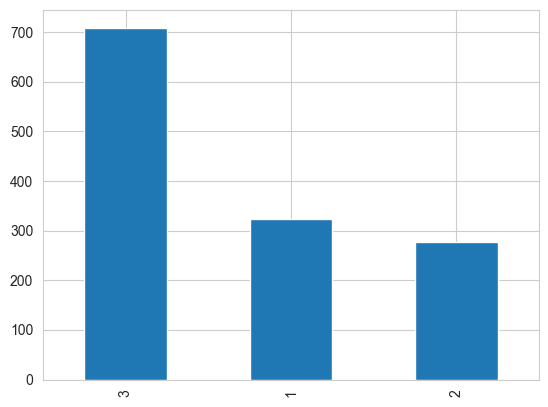

In [3]:
# 可視化
df_all.Pclass.value_counts().plot.bar()

３等級の乗客がもっとも多く、１等級、２等級の２倍以上となる。

### 料金の分布を確認する
Ticket classごとの料金の分布を確認する。

In [5]:
# Ticket class ごとの料金の確認
df_all[["Pclass", "Fare"]].groupby("Pclass").describe()

Fare                                                                 
        count       mean        std  min      25%      50%       75%       max
Pclass                                                                        
1       323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2       277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3       708.0  13.302889  11.494358  0.0   7.7500   8.0500   15.2458   69.5500

<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

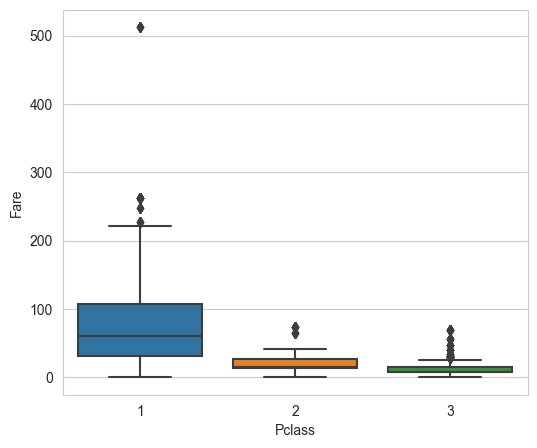

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ticket class ごとの料金の分布を可視化
plt.figure(figsize=(6, 5))
sns.boxplot(x="Pclass", y="Fare", data=df_all)

- １等級の Ticket は、３等級の７倍近い値段がする。
- １等級は価格帯の幅も広くもっとも高い Ticket は３等級平均料金の50倍になる。

１等級の中でも、さらにHigh-class の人たちは分けて集計することにする。

### １等級の Ticket のうち、高額Ticket（１等級の上位25%）を Pclass0 にする
１等級の中でも、さらに High-class の Ticket を０等級とする。
Fare が 108より大きい（１等級Class-ticket の75%分位より大きい、=全体の上位25%）ものを 0 にする。

In [9]:
# Pclass2 という変数の作成
df_all["Pclass2"] = df_all["Pclass"]

# Fare が 108 よりも大きいものを 0 に変更
df_all.loc[df_all["Fare"] > 108, "Pclass2"] = 0
df_all.loc[df_all["Pclass2"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass2
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,0
118,119,0.0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
195,196,1.0,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1263,NaN,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,0
1266,1267,NaN,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C,0
1291,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S,0
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,0
